In [1]:
from utils.functions import *
from utils.data import *

In [2]:
(train_images, train_labels), (test_images, test_labels) = load_data(INPUT_PATHS)

Loading .\data\processed\train
Loading .\data\processed\test


In [3]:
train_images.shape

(1344, 151, 192, 3)

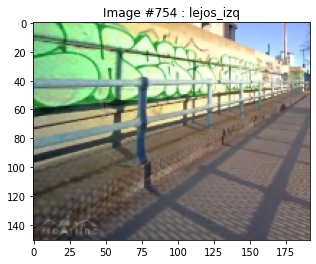

In [76]:
display_random_image(class_names_label, train_images, train_labels)

In [7]:
class_names_label

['cerca_der',
 'cerca_izq',
 'lejos_der',
 'lejos_izq',
 'peligro_der',
 'peligro_izq']

In [8]:
dict_labels= {0:'cerca_der', 1:'cerca_izq', 2:'lejos_der', 3:'lejos_izq', 4:'peligro_der', 5:'peligro_izq'}


In [3]:
pd.DataFrame({'train_labels': train_labels}
        )

,train_labels
0,0
1,0
2,0
3,0
4,0
...,...
1339,5
1340,5
1341,5
1342,5


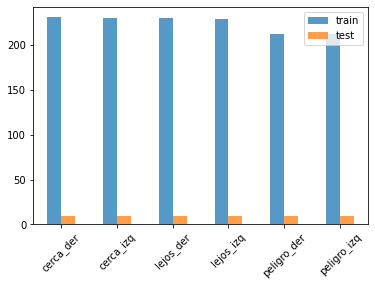

In [9]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)

pd.DataFrame({'train': train_counts,
                'test': test_counts},
                index=class_names_label
                ).plot(kind='bar',alpha=0.75, rot=45)
plt.show()

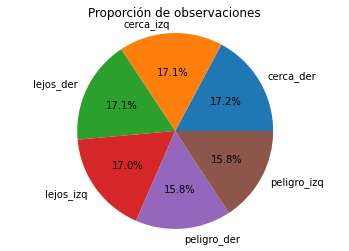

In [6]:
graphs('pie', train_labels, test_labels, class_names_label)

In [3]:
width=train_images.shape[2]
height=train_images.shape[1]
channels=train_images.shape[3]
image_size=(height, width, channels)

first_layer_conv = 64
second_layer_conv = 128

first_layer_NN = 128
second_layer_NN = 64

batch_size = 32

### PRUEBA 1

In [4]:
layers = [keras.layers.Conv2D(first_layer_conv, (3,3), activation='relu', input_shape=image_size),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Conv2D(second_layer_conv, (3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Flatten(),
            keras.layers.Dense(first_layer_NN, activation='relu'),
            keras.layers.Dense(second_layer_NN, activation='relu'),
            keras.layers.Dense(len(class_names_label), activation='softmax')
        ]

model_1 = conv_model(layers)

history_1 = model_train(model_1, 
                train_images,
                train_labels,
                batch_size = 32,
                epochs = 20,
                validation_split = 0.2)

Epoch 1/20
34/34 [==============================] - 9s 185ms/step - loss: 1.9875 - accuracy: 0.2726 - val_loss: 1.3564 - val_accuracy: 0.3941
Epoch 2/20
34/34 [==============================] - 5s 141ms/step - loss: 1.2136 - accuracy: 0.5153 - val_loss: 1.1667 - val_accuracy: 0.4498
Epoch 3/20
34/34 [==============================] - 5s 142ms/step - loss: 0.9941 - accuracy: 0.5879 - val_loss: 1.1632 - val_accuracy: 0.5353
Epoch 4/20
34/34 [==============================] - 5s 142ms/step - loss: 0.7056 - accuracy: 0.7377 - val_loss: 1.2576 - val_accuracy: 0.5428
Epoch 5/20
34/34 [==============================] - 5s 144ms/step - loss: 0.3750 - accuracy: 0.8800 - val_loss: 1.6074 - val_accuracy: 0.4833
Epoch 6/20
34/34 [==============================] - 5s 142ms/step - loss: 0.1522 - accuracy: 0.9553 - val_loss: 2.1179 - val_accuracy: 0.5130
Epoch 7/20
34/34 [==============================] - 5s 141ms/step - loss: 0.0976 - accuracy: 0.9702 - val_loss: 1.8812 - val_accuracy: 0.5130
Epoch 

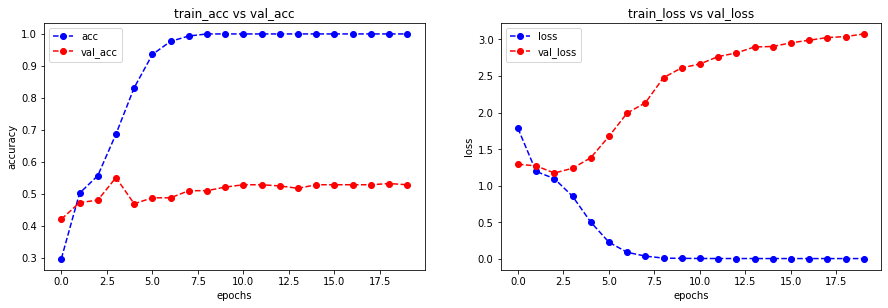

In [9]:
plot_accuracy_loss(history_1)

In [5]:
results = model_1.evaluate(test_images/255, test_labels)
results

2/2 [==============================] - 0s 360ms/step - loss: 2.8141 - accuracy: 0.6333


[2.814105749130249, 0.6333333253860474]

In [21]:
# Preguntar si esto está bien o hay que guardar el history

model_1.save("C:\\Users\\medin\\The_Bridge_School\\Alumno\\Machine Learning\\Proyecto Machine Learning\\src\\model\\prueba_1.h5")

### PRUEBA 2

In [6]:
layers = [keras.layers.Conv2D(first_layer_conv, (3,3), activation='relu', input_shape=(height, width,1)),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Conv2D(second_layer_conv, (3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Flatten(),
            keras.layers.Dense(first_layer_NN, activation='relu'),
            keras.layers.Dense(second_layer_NN, activation='relu'),
            keras.layers.Dense(len(class_names_label), activation='softmax')]

# Pasamos los datos a escala de grises
train_images_gray = color2gray(train_images)
train_images_gray = train_images_gray.reshape(train_images_gray.shape + (1,))

model_2 = conv_model(layers)

history_2 = model_train(model_2, 
                train_images_gray,
                train_labels,
                batch_size = 32,
                epochs = 20,
                validation_split = 0.2)

Epoch 1/20
34/34 [==============================] - 6s 150ms/step - loss: 1.8105 - accuracy: 0.2549 - val_loss: 1.3775 - val_accuracy: 0.3569
Epoch 2/20
34/34 [==============================] - 5s 140ms/step - loss: 1.2873 - accuracy: 0.4819 - val_loss: 1.2279 - val_accuracy: 0.4647
Epoch 3/20
34/34 [==============================] - 5s 137ms/step - loss: 1.0838 - accuracy: 0.5684 - val_loss: 1.1742 - val_accuracy: 0.5279
Epoch 4/20
34/34 [==============================] - 5s 138ms/step - loss: 0.9541 - accuracy: 0.6195 - val_loss: 1.1812 - val_accuracy: 0.5502
Epoch 5/20
34/34 [==============================] - 5s 138ms/step - loss: 0.7497 - accuracy: 0.7172 - val_loss: 1.1694 - val_accuracy: 0.5651
Epoch 6/20
34/34 [==============================] - 5s 137ms/step - loss: 0.5206 - accuracy: 0.8167 - val_loss: 1.3693 - val_accuracy: 0.5836
Epoch 7/20
34/34 [==============================] - 5s 138ms/step - loss: 0.2820 - accuracy: 0.9107 - val_loss: 1.4420 - val_accuracy: 0.5725
Epoch 

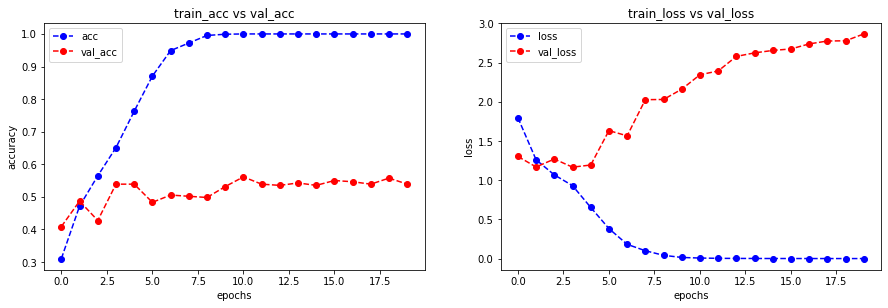

In [11]:
plot_accuracy_loss(history_2)

In [7]:
test_images_gray = color2gray(test_images)
test_images_gray = test_images_gray.reshape(test_images_gray.shape + (1,))
results = model_2.evaluate(test_images_gray/255, test_labels)
results

2/2 [==============================] - 0s 162ms/step - loss: 2.6257 - accuracy: 0.6333


[2.6257147789001465, 0.6333333253860474]

In [22]:
model_2.save("C:\\Users\\medin\\The_Bridge_School\\Alumno\\Machine Learning\\Proyecto Machine Learning\\src\\model\\prueba_2.h5")

### PRUEBA 3

In [8]:
layers = [keras.layers.Conv2D(first_layer_conv, (3,3), activation='relu', input_shape=image_size),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Conv2D(second_layer_conv, (3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Flatten(),
            keras.layers.Dense(first_layer_NN, activation='relu'),
            keras.layers.Dense(second_layer_NN, activation='relu'),
            keras.layers.Dense(len(class_names_label), activation='softmax')]

# Pasamos los datos a colores negativos
train_images_neg = negative_colors(train_images)

model_3 = conv_model(layers)

history_3 = model_train(model_3, 
                train_images_neg,
                train_labels,
                batch_size = 32,
                epochs = 20,
                validation_split = 0.2)

Epoch 1/20
34/34 [==============================] - 7s 184ms/step - loss: 2.1036 - accuracy: 0.2233 - val_loss: 1.5770 - val_accuracy: 0.2416
Epoch 2/20
34/34 [==============================] - 6s 178ms/step - loss: 1.4551 - accuracy: 0.3377 - val_loss: 1.4136 - val_accuracy: 0.3717
Epoch 3/20
34/34 [==============================] - 6s 177ms/step - loss: 1.2601 - accuracy: 0.4567 - val_loss: 1.2411 - val_accuracy: 0.4610
Epoch 4/20
34/34 [==============================] - 6s 179ms/step - loss: 1.0187 - accuracy: 0.5833 - val_loss: 1.2143 - val_accuracy: 0.4498
Epoch 5/20
34/34 [==============================] - 6s 179ms/step - loss: 0.6774 - accuracy: 0.7526 - val_loss: 1.4859 - val_accuracy: 0.4758
Epoch 6/20
34/34 [==============================] - 6s 179ms/step - loss: 0.3745 - accuracy: 0.8726 - val_loss: 1.7990 - val_accuracy: 0.5167
Epoch 7/20
34/34 [==============================] - 6s 178ms/step - loss: 0.1912 - accuracy: 0.9414 - val_loss: 2.2080 - val_accuracy: 0.5056
Epoch 

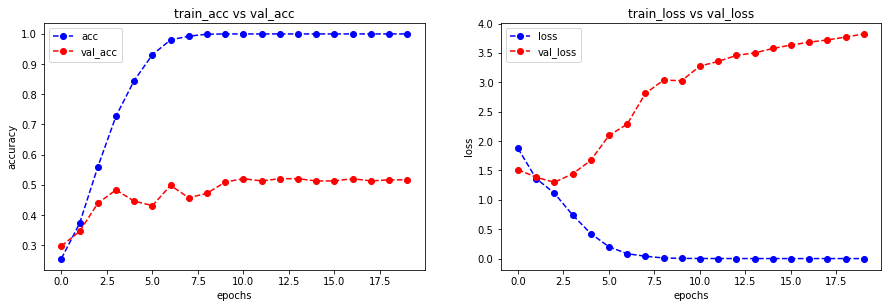

In [13]:
plot_accuracy_loss(history_3)

In [9]:
test_images_neg = negative_colors(test_images)
results = model_3.evaluate(test_images_neg/255, test_labels)
results

2/2 [==============================] - 0s 47ms/step - loss: 2.9704 - accuracy: 0.4833


[2.970358371734619, 0.4833333194255829]

In [23]:
model_3.save("C:\\Users\\medin\\The_Bridge_School\\Alumno\\Machine Learning\\Proyecto Machine Learning\\src\\model\\prueba_3.h5")

### PRUEBA 4

In [4]:
layers = [keras.layers.Conv2D(first_layer_conv, (3,3), activation='relu', input_shape=image_size),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Conv2D(second_layer_conv, (3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Flatten(),
            keras.layers.Dense(first_layer_NN, activation='relu'),
            keras.layers.Dense(second_layer_NN, activation='relu'),
            keras.layers.Dense(len(class_names_label), activation='softmax')]

# Pasamos los datos a color monocromático. En este caso el canal azul.
train_images_mono = monocolor(train_images, color = 'blue')

model_4_b = conv_model(layers)

history_4_b = model_train(model_4_b, 
                train_images_mono,
                train_labels,
               batch_size = 32,
                epochs = 20,
                validation_split = 0.2)

Epoch 1/20
34/34 [==============================] - 11s 177ms/step - loss: 1.6458 - accuracy: 0.3237 - val_loss: 1.3206 - val_accuracy: 0.3941
Epoch 2/20
34/34 [==============================] - 5s 142ms/step - loss: 1.2254 - accuracy: 0.5126 - val_loss: 1.2125 - val_accuracy: 0.5056
Epoch 3/20
34/34 [==============================] - 5s 145ms/step - loss: 1.0431 - accuracy: 0.5842 - val_loss: 1.1626 - val_accuracy: 0.5093
Epoch 4/20
34/34 [==============================] - 5s 146ms/step - loss: 0.8150 - accuracy: 0.6884 - val_loss: 1.3173 - val_accuracy: 0.5204
Epoch 5/20
34/34 [==============================] - 5s 146ms/step - loss: 0.4926 - accuracy: 0.8130 - val_loss: 1.2858 - val_accuracy: 0.5279
Epoch 6/20
34/34 [==============================] - 5s 146ms/step - loss: 0.2413 - accuracy: 0.9265 - val_loss: 1.4138 - val_accuracy: 0.5576
Epoch 7/20
34/34 [==============================] - 5s 146ms/step - loss: 0.1171 - accuracy: 0.9693 - val_loss: 1.7642 - val_accuracy: 0.5465
Epoch

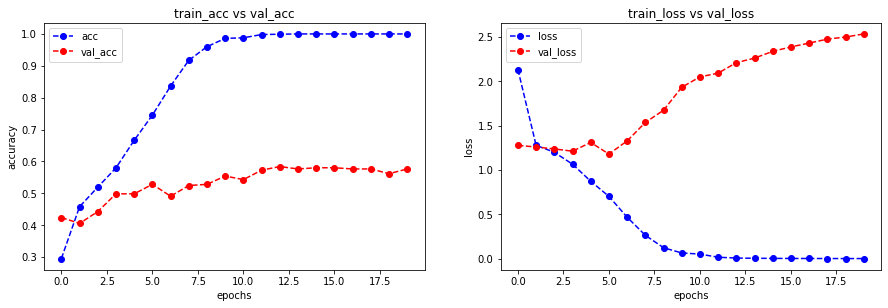

In [7]:
plot_accuracy_loss(history_4_b)

In [5]:
test_images_mono = monocolor(test_images, color = 'blue')
test_images_mono = test_images_mono.reshape(test_images_mono.shape + (1,))
results = model_4_b.evaluate(test_images_mono/255, test_labels)
results

2/2 [==============================] - 1s 364ms/step - loss: 3.3558 - accuracy: 0.5333


[3.35579776763916, 0.5333333611488342]

In [9]:
model_4_b.save("C:\\Users\\medin\\The_Bridge_School\\Alumno\\Machine Learning\\Proyecto Machine Learning\\src\\model\\prueba_4_b.h5")

In [6]:
layers = [keras.layers.Conv2D(first_layer_conv, (3,3), activation='relu', input_shape=image_size),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Conv2D(second_layer_conv, (3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Flatten(),
            keras.layers.Dense(first_layer_NN, activation='relu'),
            keras.layers.Dense(second_layer_NN, activation='relu'),
            keras.layers.Dense(len(class_names_label), activation='softmax')]

# Pasamos los datos a color monocromático. En este caso el canal azul.
train_images_mono = monocolor(train_images, color = 'red')

model_4_r = conv_model(layers)

history_4_r = model_train(model_4_r, 
                train_images_mono,
                train_labels,
               batch_size = 32,
                epochs = 20,
                validation_split = 0.2)

Epoch 1/20
34/34 [==============================] - 5s 146ms/step - loss: 1.7683 - accuracy: 0.2958 - val_loss: 1.3533 - val_accuracy: 0.4052
Epoch 2/20
34/34 [==============================] - 5s 142ms/step - loss: 1.2624 - accuracy: 0.4809 - val_loss: 1.2133 - val_accuracy: 0.4684
Epoch 3/20
34/34 [==============================] - 5s 144ms/step - loss: 1.0951 - accuracy: 0.5740 - val_loss: 1.1253 - val_accuracy: 0.5167
Epoch 4/20
34/34 [==============================] - 5s 148ms/step - loss: 0.8629 - accuracy: 0.6623 - val_loss: 1.2337 - val_accuracy: 0.5316
Epoch 5/20
34/34 [==============================] - 5s 149ms/step - loss: 0.6869 - accuracy: 0.7526 - val_loss: 1.2700 - val_accuracy: 0.5204
Epoch 6/20
34/34 [==============================] - 5s 143ms/step - loss: 0.4535 - accuracy: 0.8372 - val_loss: 1.4873 - val_accuracy: 0.5130
Epoch 7/20
34/34 [==============================] - 5s 147ms/step - loss: 0.2639 - accuracy: 0.9172 - val_loss: 1.5925 - val_accuracy: 0.5130
Epoch 

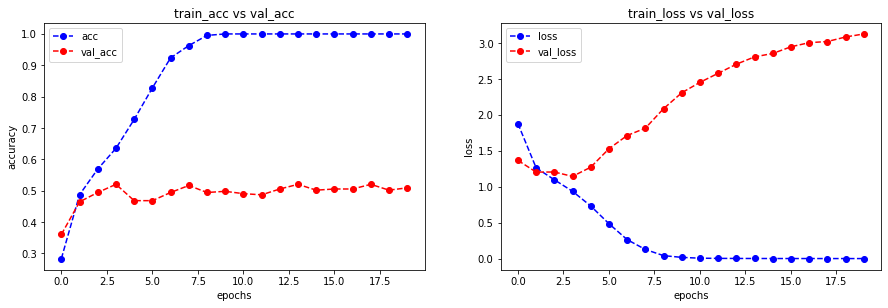

In [6]:
plot_accuracy_loss(history_4_r)

In [7]:
test_images_mono = monocolor(test_images, color = 'red')
test_images_mono = test_images_mono.reshape(test_images_mono.shape + (1,))
results = model_4_r.evaluate(test_images_mono/255, test_labels)
results

2/2 [==============================] - 0s 46ms/step - loss: 3.1708 - accuracy: 0.5667


[3.1708309650421143, 0.5666666626930237]

In [8]:
model_4_r.save("C:\\Users\\medin\\The_Bridge_School\\Alumno\\Machine Learning\\Proyecto Machine Learning\\src\\model\\prueba_4_r.h5")

In [4]:
layers = [keras.layers.Conv2D(first_layer_conv, (3,3), activation='relu', input_shape=image_size),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Conv2D(second_layer_conv, (3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Flatten(),
            keras.layers.Dense(first_layer_NN, activation='relu'),
            keras.layers.Dense(second_layer_NN, activation='relu'),
            keras.layers.Dense(len(class_names_label), activation='softmax')]

# Pasamos los datos a color monocromático. En este caso el canal azul.
train_images_mono = monocolor(train_images, color = 'green')

model_4_g = conv_model(layers)

history_4_g = model_train(model_4_g, 
                train_images_mono,
                train_labels,
               batch_size = 32,
                epochs = 20,
                validation_split = 0.2)

Epoch 1/20
34/34 [==============================] - 9s 176ms/step - loss: 1.7921 - accuracy: 0.2865 - val_loss: 1.3529 - val_accuracy: 0.4089
Epoch 2/20
34/34 [==============================] - 5s 142ms/step - loss: 1.2766 - accuracy: 0.4874 - val_loss: 1.2347 - val_accuracy: 0.4461
Epoch 3/20
34/34 [==============================] - 5s 143ms/step - loss: 1.1458 - accuracy: 0.5674 - val_loss: 1.1301 - val_accuracy: 0.4758
Epoch 4/20
34/34 [==============================] - 5s 142ms/step - loss: 0.9114 - accuracy: 0.6540 - val_loss: 1.2022 - val_accuracy: 0.5056
Epoch 5/20
34/34 [==============================] - 5s 145ms/step - loss: 0.7331 - accuracy: 0.7144 - val_loss: 1.3846 - val_accuracy: 0.4610
Epoch 6/20
34/34 [==============================] - 5s 142ms/step - loss: 0.4937 - accuracy: 0.8186 - val_loss: 1.3028 - val_accuracy: 0.5242
Epoch 7/20
34/34 [==============================] - 5s 141ms/step - loss: 0.2387 - accuracy: 0.9358 - val_loss: 1.7364 - val_accuracy: 0.4758
Epoch 

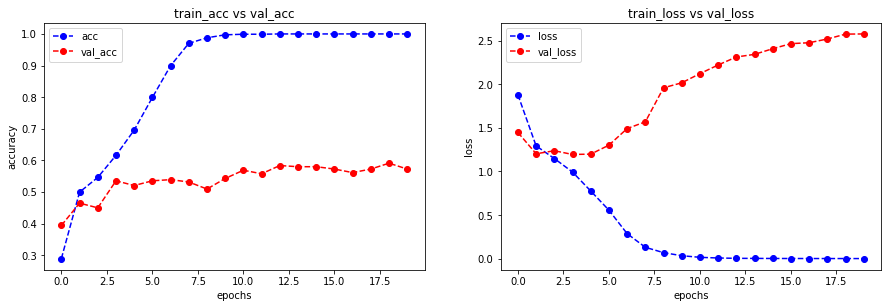

In [10]:
plot_accuracy_loss(history_4_g)

In [5]:
test_images_mono = monocolor(test_images, color = 'green')
test_images_mono = test_images_mono.reshape(test_images_mono.shape + (1,))
results = model_4_g.evaluate(test_images_mono/255, test_labels)
results

2/2 [==============================] - 1s 372ms/step - loss: 2.6924 - accuracy: 0.6000


[2.6923937797546387, 0.6000000238418579]

In [12]:
model_4_g.save("C:\\Users\\medin\\The_Bridge_School\\Alumno\\Machine Learning\\Proyecto Machine Learning\\src\\model\\prueba_4_g.h5")

### PRUEBA 5

In [6]:
layers = [keras.layers.Conv2D(first_layer_conv, (3,3), activation='relu', input_shape=(height, width,1)),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Conv2D(second_layer_conv, (3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Flatten(),
            keras.layers.Dense(first_layer_NN, activation='relu'),
            keras.layers.Dense(second_layer_NN, activation='relu'),
            keras.layers.Dense(len(class_names_label), activation='softmax')]

# Pasamos los datos a escala de grises y luego ponemos los colores en negativo.
train_images_gray = color2gray(train_images)
train_images_neg = negative_colors(train_images_gray)
train_images_neg = train_images_neg.reshape(train_images_neg.shape + (1,))


model_5 = conv_model(layers)

history_5 = model_train(model_5, 
                train_images_neg,
                train_labels,
               batch_size = 32,
                epochs = 20,
                validation_split = 0.2)

Epoch 1/20
34/34 [==============================] - 6s 152ms/step - loss: 1.8360 - accuracy: 0.2521 - val_loss: 1.5730 - val_accuracy: 0.2788
Epoch 2/20
34/34 [==============================] - 5s 138ms/step - loss: 1.3962 - accuracy: 0.3609 - val_loss: 1.3671 - val_accuracy: 0.3903
Epoch 3/20
34/34 [==============================] - 5s 136ms/step - loss: 1.1252 - accuracy: 0.5330 - val_loss: 1.1834 - val_accuracy: 0.5242
Epoch 4/20
34/34 [==============================] - 5s 137ms/step - loss: 0.8109 - accuracy: 0.6921 - val_loss: 1.2336 - val_accuracy: 0.5167
Epoch 5/20
34/34 [==============================] - 5s 137ms/step - loss: 0.5460 - accuracy: 0.7926 - val_loss: 1.4292 - val_accuracy: 0.4684
Epoch 6/20
34/34 [==============================] - 5s 140ms/step - loss: 0.3116 - accuracy: 0.8986 - val_loss: 1.6569 - val_accuracy: 0.4610
Epoch 7/20
34/34 [==============================] - 5s 138ms/step - loss: 0.1385 - accuracy: 0.9628 - val_loss: 1.9469 - val_accuracy: 0.5353
Epoch 

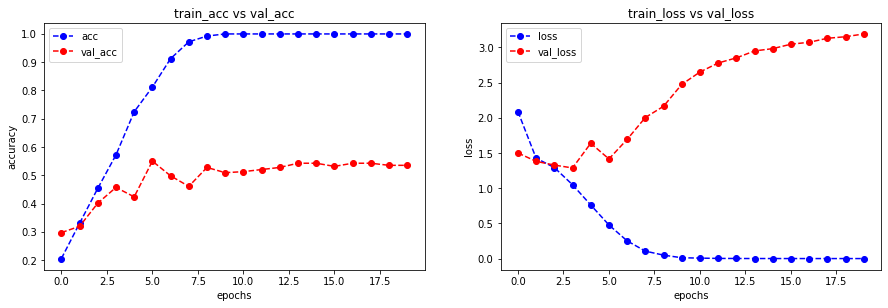

In [25]:
plot_accuracy_loss(history_5)

In [7]:
test_images_gray = color2gray(test_images)
test_images_neg = negative_colors(test_images_gray)
test_images_neg = test_images_neg.reshape(test_images_neg.shape + (1,))
results = model_5.evaluate(test_images_neg, test_labels)
results

2/2 [==============================] - 0s 158ms/step - loss: 887.1427 - accuracy: 0.4667


[887.1427001953125, 0.46666666865348816]

In [24]:
model_5.save("C:\\Users\\medin\\The_Bridge_School\\Alumno\\Machine Learning\\Proyecto Machine Learning\\src\\model\\prueba_5.h5")

### PRUEBA 1.1.

In [8]:
first_layer_conv = 48
second_layer_conv = 128
third_layer_conv = 192
forth_layer_conv = 192
fifth_layer_conv = 192
first_layer_NN = 192
second_layer_NN = 128
batch_size = 32

In [4]:
train_images_240x240 = resize_img(train_images)

In [9]:
layers = [keras.layers.Conv2D(first_layer_conv, (5,5), activation='relu', input_shape=image_size),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Conv2D(second_layer_conv, (5,5), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2,2)),

            keras.layers.Conv2D(third_layer_conv, (3,3), activation='relu'),

            keras.layers.Conv2D(forth_layer_conv, (3,3), activation='relu'),

            keras.layers.Conv2D(fifth_layer_conv, (3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Flatten(),
            keras.layers.Dense(first_layer_NN, activation='relu'),
            keras.layers.Dense(second_layer_NN, activation='relu'),
            keras.layers.Dense(len(class_names_label), activation='softmax')
        ]

model_1_1 = conv_model(layers)

history_1_1 = model_train(model_1_1, 
                train_images,
                train_labels,
                batch_size = 32,
                epochs = 30,
                validation_split = 0.2)

Epoch 1/30
34/34 [==============================] - 12s 276ms/step - loss: 1.8666 - accuracy: 0.2205 - val_loss: 1.6663 - val_accuracy: 0.2639
Epoch 2/30
34/34 [==============================] - 7s 218ms/step - loss: 1.5276 - accuracy: 0.2958 - val_loss: 1.4093 - val_accuracy: 0.3346
Epoch 3/30
34/34 [==============================] - 7s 219ms/step - loss: 1.4018 - accuracy: 0.4009 - val_loss: 1.3065 - val_accuracy: 0.3903
Epoch 4/30
34/34 [==============================] - 7s 219ms/step - loss: 1.3201 - accuracy: 0.4372 - val_loss: 1.3284 - val_accuracy: 0.4312
Epoch 5/30
34/34 [==============================] - 7s 218ms/step - loss: 1.2649 - accuracy: 0.4828 - val_loss: 1.2577 - val_accuracy: 0.4647
Epoch 6/30
34/34 [==============================] - 7s 218ms/step - loss: 1.2061 - accuracy: 0.5042 - val_loss: 1.2658 - val_accuracy: 0.4647
Epoch 7/30
34/34 [==============================] - 7s 218ms/step - loss: 1.1345 - accuracy: 0.5237 - val_loss: 1.2832 - val_accuracy: 0.4201
Epoch

In [10]:
results = model_1_1.evaluate(test_images, test_labels)
results

2/2 [==============================] - 1s 592ms/step - loss: 992.7807 - accuracy: 0.4833


[992.7807006835938, 0.4833333194255829]

### PRUEBA 6.

In [3]:
width=train_images.shape[2]
height=train_images.shape[1]
channels=train_images.shape[3]
image_size=(height, width, channels)

first_layer_conv = 64
second_layer_conv = 128

first_layer_NN = 128
second_layer_NN = 64

batch_size = 32

In [4]:
layers = [keras.layers.Conv2D(first_layer_conv, (3,3), activation='relu', input_shape=image_size),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
            #keras.layers.Dropout(0.2),
    
            keras.layers.Conv2D(second_layer_conv, (3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
            #keras.layers.Dropout(0.2),
    
            keras.layers.Flatten(),
            keras.layers.Dense(first_layer_NN, activation='relu'),
            keras.layers.Dense(second_layer_NN, activation='relu'),
            keras.layers.Dense(len(class_names_label), activation='softmax')
        ]

train_images_edited = edit_image(train_images, alpha = 1.5, beta = 20)

model_6 = conv_model(layers)

history_6 = model_train(model_6,
                train_images_edited,
                train_labels,
                batch_size = 32,
                epochs = 15,
                validation_split = 0.2
                )

Epoch 1/15
34/34 [==============================] - 9s 179ms/step - loss: 2.6492 - accuracy: 0.2242 - val_loss: 1.4571 - val_accuracy: 0.2937
Epoch 2/15
34/34 [==============================] - 5s 145ms/step - loss: 1.4015 - accuracy: 0.3684 - val_loss: 1.3613 - val_accuracy: 0.3866
Epoch 3/15
34/34 [==============================] - 5s 145ms/step - loss: 1.2893 - accuracy: 0.4549 - val_loss: 1.3101 - val_accuracy: 0.4312
Epoch 4/15
34/34 [==============================] - 5s 145ms/step - loss: 1.1247 - accuracy: 0.5349 - val_loss: 1.2666 - val_accuracy: 0.4387
Epoch 5/15
34/34 [==============================] - 5s 145ms/step - loss: 0.9365 - accuracy: 0.6316 - val_loss: 1.2080 - val_accuracy: 0.5056
Epoch 6/15
34/34 [==============================] - 5s 146ms/step - loss: 0.6314 - accuracy: 0.7814 - val_loss: 1.4074 - val_accuracy: 0.4312
Epoch 7/15
34/34 [==============================] - 5s 145ms/step - loss: 0.3991 - accuracy: 0.8605 - val_loss: 1.4424 - val_accuracy: 0.4387
Epoch 

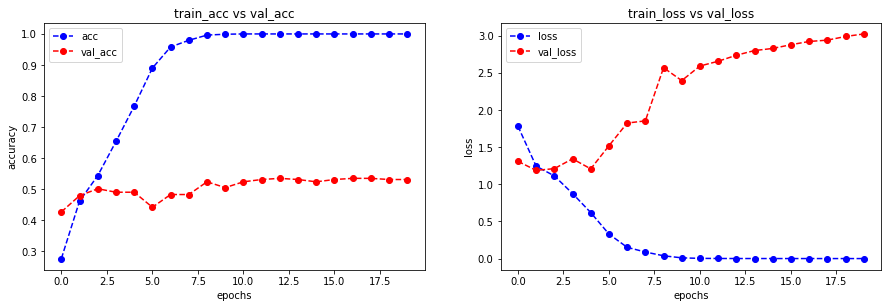

In [6]:
plot_accuracy_loss(history_6)

In [5]:
test_images_neg = edit_image(test_images, alpha = 1.5, beta = 20)/255
results = model_6.evaluate(test_images_neg, test_labels)
results

2/2 [==============================] - 0s 362ms/step - loss: 3.1036 - accuracy: 0.5667


[3.1036031246185303, 0.5666666626930237]

In [23]:
model_6.save("C:\\Users\\medin\\The_Bridge_School\\Alumno\\Machine Learning\\Proyecto Machine Learning\\src\\model\\prueba_6.h5")

### PRUEBA 6.1.

In [54]:
first_layer_conv = 48
second_layer_conv = 128
third_layer_conv = 192
forth_layer_conv = 192
fifth_layer_conv = 192
first_layer_NN = 192
second_layer_NN = 128
batch_size = 32

In [55]:
layers = [keras.layers.Conv2D(first_layer_conv, (5,5), activation='relu', input_shape=image_size),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Conv2D(second_layer_conv, (5,5), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2,2)),

            keras.layers.Conv2D(third_layer_conv, (3,3), activation='relu'),

            keras.layers.Conv2D(forth_layer_conv, (3,3), activation='relu'),

            keras.layers.Conv2D(fifth_layer_conv, (3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
    
            keras.layers.Flatten(),
            keras.layers.Dense(first_layer_NN, activation='relu'),
            keras.layers.Dense(second_layer_NN, activation='relu'),
            keras.layers.Dense(len(class_names_label), activation='softmax')
        ]

train_images_edited = edit_image(train_images, alpha = 1.5, beta = 20)
model_6_1 = conv_model(layers)

history_6_1 = model_train(model_6_1, 
                train_images_edited,
                train_labels,
                batch_size = 32,
                epochs = 30,
                validation_split = 0.2
                )

Epoch 1/30
34/34 [==============================] - 12s 277ms/step - loss: 1.7031 - accuracy: 0.2428 - val_loss: 1.6436 - val_accuracy: 0.3123
Epoch 2/30
34/34 [==============================] - 9s 265ms/step - loss: 1.4326 - accuracy: 0.3470 - val_loss: 1.3103 - val_accuracy: 0.3903
Epoch 3/30
34/34 [==============================] - 9s 265ms/step - loss: 1.2870 - accuracy: 0.4660 - val_loss: 1.3234 - val_accuracy: 0.3755
Epoch 4/30
34/34 [==============================] - 9s 266ms/step - loss: 1.2423 - accuracy: 0.4623 - val_loss: 1.2559 - val_accuracy: 0.4796
Epoch 5/30
34/34 [==============================] - 9s 266ms/step - loss: 1.2476 - accuracy: 0.4698 - val_loss: 1.4311 - val_accuracy: 0.4201
Epoch 6/30
34/34 [==============================] - 9s 266ms/step - loss: 1.1648 - accuracy: 0.5312 - val_loss: 1.4039 - val_accuracy: 0.4647
Epoch 7/30
34/34 [==============================] - 9s 265ms/step - loss: 1.0895 - accuracy: 0.5488 - val_loss: 1.2732 - val_accuracy: 0.4461
Epoch

In [56]:
test_images_neg = edit_image(test_images, alpha = 1.5, beta = 20)
results = model_6_1.evaluate(test_images_neg, test_labels)
results

2/2 [==============================] - 1s 643ms/step - loss: 1064.8488 - accuracy: 0.3833


[1064.8487548828125, 0.38333332538604736]

In [3]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

In [4]:
base_model = ResNet50V2(input_shape = (224, 224, 3),
                       include_top = False,
                       weights = None,
                       classifier_activation= "softmax")

train_images_resized = resize_img(train_images, 224, 224)

x = keras.layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = keras.layers.Dense(256, activation='relu')(x)

# Add a dropout rate of 0.5
x = keras.layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = keras.layers.Dense(1, activation='softmax')(x)

model = keras.models.Model(base_model.input, x)
    
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['acc'])

model.fit(train_images_resized,
         train_labels,
         validation_split = 0.2,
         steps_per_epoch = 80,
         epochs = 20)

Epoch 1/20
80/80 [==============================] - 43s 434ms/step - loss: nan - acc: 0.2122 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/20
80/80 [==============================] - 31s 382ms/step - loss: nan - acc: 0.2193 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/20
80/80 [==============================] - 31s 385ms/step - loss: nan - acc: 0.2104 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/20
80/80 [==============================] - 31s 386ms/step - loss: nan - acc: 0.2149 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/20
80/80 [==============================] - 31s 386ms/step - loss: nan - acc: 0.2158 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/20
80/80 [==============================] - 31s 383ms/step - loss: nan - acc: 0.2149 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/20
80/80 [==============================] - 31s 386ms/step - loss: nan - acc: 0.2149 - val_loss: nan - val_acc: 0.0000e+00
Epoch 8/20
80/80 [==============================] - 31s 384ms/step - loss: nan - ac

In [5]:
test_images_neg = resize_img(test_images, 224, 224)
results = model.evaluate(test_images_neg, test_labels)
results

2/2 [==============================] - 1s 1s/step - loss: nan - acc: 0.1667


[nan, 0.1666666716337204]

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape=(224, 224, 3),
                  include_top = False,
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

x = keras.layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = keras.layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = keras.layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = keras.layers.Dense(1, activation='softmax')(x)

model = keras.models.Model(base_model.input, x)

train_images_resized = resize_img(train_images, 224, 224)
    
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

vgghist = model.fit(train_images_resized,
                    train_labels,
                    validation_split = 0.2,
                    epochs = 10)

Epoch 1/10
34/34 [==============================] - 24s 560ms/step - loss: nan - acc: 0.2195 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/10
34/34 [==============================] - 15s 448ms/step - loss: nan - acc: 0.2149 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/10
34/34 [==============================] - 15s 452ms/step - loss: nan - acc: 0.2149 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/10
34/34 [==============================] - 15s 448ms/step - loss: nan - acc: 0.2149 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/10
34/34 [==============================] - 15s 452ms/step - loss: nan - acc: 0.2149 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/10
34/34 [==============================] - 15s 452ms/step - loss: nan - acc: 0.2149 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/10
34/34 [==============================] - 15s 452ms/step - loss: nan - acc: 0.2149 - val_loss: nan - val_acc: 0.0000e+00
Epoch 8/10
34/34 [==============================] - 15s 453ms/step - loss: nan - ac

In [18]:
from sklearn.metrics import confusion_matrix

In [29]:
test_images_edited = edit_image(test_images, alpha = 1.5, beta = 20)
predictions = model_6.predict(test_images_edited/255)
pred_labels = np.argmax(predictions, axis=1)

In [30]:
len(pred_labels)

60

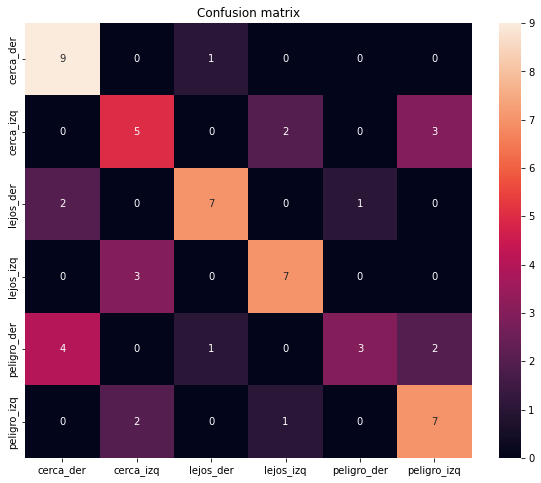

In [32]:
test_images_edited = edit_image(test_images, alpha = 1.5, beta = 20)
predictions = model_6.predict(test_images_edited/255)
pred_labels = np.argmax(predictions, axis=1)
CM = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(10,8))
ax = plt.axes()
sns.heatmap(CM, annot=True, annot_kws={'size':10}, xticklabels=class_names_label, yticklabels=class_names_label)
ax.set_title('Confusion matrix')
plt.show()

In [8]:
df = pd.DataFrame({'accuracy':[2.8141, 2.6257, 2.9704, 3.3558, 3.1708, 2.6924, 2.9928, 2.3350], 
'loss':[0.6333, 0.6333, 0.4833, 0.5333, 0.5667, 0.6000, 0.5822, 0.6333]}
)

df.index = ['prueba 1', 'prueba 2', 'prueba 3', 'prueba 4_b', 'prueba 4_r', 'prueba 4_g', 'prueba 5', 'prueba 6']

In [9]:
df

,accuracy,loss
prueba 1,2.8141,0.6333
prueba 2,2.6257,0.6333
prueba 3,2.9704,0.4833
prueba 4_b,3.3558,0.5333
prueba 4_r,3.1708,0.5667
prueba 4_g,2.6924,0.6000
prueba 5,2.9928,0.5822
prueba 6,2.3350,0.6333


### FUNCIONAMIENTO EN APP

In [ ]:
model_selected = 'prueba_6.h5'

model = load_model("C:\\Users\\medin\\The_Bridge_School\\Alumno\\Machine Learning\\Proyecto Machine Learning\\src\\model\\prueba_6.h5")

m_sec = 1000  # milisegundos entre frame y frame

count = 0
capture = cv.VideoCapture(0) # cambiar a 1 cuando sea una webcam externa
while True:
    capture.set(cv.CAP_PROP_POS_MSEC,(count*m_sec))
    success,image = capture.read()
    cv.imshow("test", image)
    left_image, right_image = processer(image)
    print('Position left:', model.predict(left_image))
    print('Position right:', model.predict(right_image))
    count = count + 1
    if cv.waitKey(20) & 0xFF==ord('q'): #si la letra q está pulsada sale del modo webcam
        break

capture.release()

cv.destroyAllWindows()